# Regression with Automatic Differentiation in TensorFlow

# Task 1: TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Using TensorFlow version:', tf.__version__)
print('Devices available:', tf.config.list_physical_devices())

Using TensorFlow version: 2.2.0
Devices available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]


# Task 2: Constants

In [2]:
# Declaring a constant
tf.constant([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [3]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [4]:
tf.convert_to_tensor([1,2,3], dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [5]:
tf.convert_to_tensor([1,2,3]).numpy()

array([1, 2, 3], dtype=int32)

# Task 3: Variables

In [6]:
# Declaring a variable
tf.Variable([1,2,3])

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [8]:
# Assigning a new value to a variable
v = tf.Variable(1)
print("val:", v.numpy())
v.assign(2)
print("val:", v.numpy())

val: 1
val: 2


In [9]:
# Matrix Mul between a constant and a variable
c = tf.convert_to_tensor(np.random.rand(2,3))
v = tf.Variable(np.random.rand(3,1))
print(tf.matmul(c,v))

tf.Tensor(
[[0.84671092]
 [1.08651172]], shape=(2, 1), dtype=float64)


# Task 4: Automatic Differentiation

Let's take a simple equation as an example:
\begin{equation}
y = x^3 ; \frac{dy}{dx} = 3x^2
\end{equation}

In [11]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x**3
dy_dx = tape.gradient(y, x)
print("gradient at x={} is {}".format(x.numpy(),dy_dx))

gradient at x=3.0 is 27.0


What about higher order gradients?

\begin{equation}
y = x^3 ; \frac{dy}{dx} = 3x^2 ; \frac{d^2 y}{dx^2} = 6x
\end{equation}

In [12]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
        y = x**3
    dy_dx = tape2.gradient(y, x)
d2y_dx2 = tape1.gradient(dy_dx, x)
print("2nd order gradient at x={} is {}".format(x.numpy(),d2y_dx2))

2nd order gradient at x=3.0 is 18.0


# Task 5: Watching Tensors

In [13]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    y = x**3

dy_dx = tape.gradient(y, x)
print(dy_dx)

None


In [14]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**3

dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(27.0, shape=(), dtype=float32)


# Task 6: Persistent Tape

\begin{equation}
y = x^3 ; z = 2y ; \frac{dz}{dx} = \frac{dz}{dy} . \frac{dy}{dx}
\end{equation}

In [15]:
x = tf.Variable(3.0)
with tf.GradientTape(persistent=True) as tape:
    y = x**3
    z = 2*y

dz_dy = tape.gradient(z, y)   
dy_dx = tape.gradient(y, x)
dz_dx = tape.gradient(z, x)

del tape 

print("dz_dy:", dz_dy.numpy())
print("dy_dx:", dy_dx.numpy())
print("dz_dx:", dz_dx.numpy())

dz_dy: 2.0
dy_dx: 27.0
dz_dx: 54.0


# Task 7: Generating Data for Linear Regression

Solve a simple linear equation:

\begin{equation}
y = wx + b
\end{equation}

In [0]:
true_w, true_b = 7., 4.

def create_batch(batch_size=64):
    x = np.random.randn(batch_size, 1)
    y = np.random.randn(batch_size, 1) + true_w * x + true_b
    return x, y

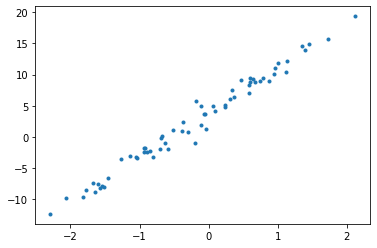

In [31]:
x, y = create_batch()
plt.plot(x, y, '.')

# Task 8: Linear Regression

In [32]:
iterations = 100
lr = 0.03

w_history = []
b_history = []

w = tf.Variable(10.0)
b = tf.Variable(1.0)

for i in range(0, iterations):
    x_batch, y_batch = create_batch()
    x_batch = tf.convert_to_tensor(x_batch, dtype=tf.float32)
    y_batch = tf.convert_to_tensor(y_batch, dtype=tf.float32) 
    with tf.GradientTape(persistent=True) as tape:
        y = b + w * x_batch
        loss = tf.reduce_mean(tf.square(y - y_batch))
    dw = tape.gradient(loss, w)
    db = tape.gradient(loss, b)
    
    del tape
    
    w.assign_sub(lr*dw)
    b.assign_sub(lr*db) 
    
    w_history.append(w.numpy())
    b_history.append(b.numpy())
    
    if  i%10==0:
        print("Iteration: {}, w: {}, b: {}".format(i, w.numpy(), b.numpy()))

Iteration: 0, w: 9.863370895385742, b: 1.1543816328048706
Iteration: 10, w: 8.549626350402832, b: 2.351086139678955
Iteration: 20, w: 7.781948089599609, b: 3.080034017562866
Iteration: 30, w: 7.390927314758301, b: 3.5235812664031982
Iteration: 40, w: 7.218851089477539, b: 3.731355667114258
Iteration: 50, w: 7.132312297821045, b: 3.8647444248199463
Iteration: 60, w: 7.07395076751709, b: 3.943063497543335
Iteration: 70, w: 7.043975830078125, b: 3.9605045318603516
Iteration: 80, w: 7.022345066070557, b: 3.96101713180542
Iteration: 90, w: 7.021440029144287, b: 3.980226755142212


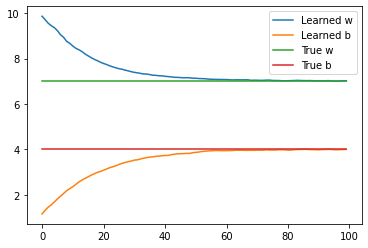

In [33]:
# Plotting the points
plt.plot(range(iterations), w_history, label="Learned w")
plt.plot(range(iterations), b_history, label="Learned b")
plt.plot(range(iterations), [true_w]*iterations, label="True w")
plt.plot(range(iterations), [true_b]*iterations, label="True b")
plt.legend()
plt.show()